## what we want to achive ? 

* segement the Customers based on RFM so that the company can target the right customers with the right offers at the right time.

### R (Recency) : Number of days since the last purchase 
### F(Frequency) : Number of tracsactions 
### M(Monetary) : Total amount of transactions (revenue contributed)

In [118]:
# import required libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt 
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [119]:
retail = pd.read_csv('customer_data.csv',sep=',' , encoding= 'ISO-8859-1' , header=0)

In [120]:
retail.head(5)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


In [121]:
retail.shape

(541909, 9)

In [122]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


## Data cleaning 

In [123]:
# calulateing the Missing Values % contribution in DF 

df_null = round(100*(retail.isnull().sum()/len(retail)), 2)
df_null 

Unnamed: 0      0.00
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [124]:
# put in Dataframe
df_null = pd.DataFrame(df_null)
df_null = df_null.T
df_null

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0.0,0.0,0.0,0.27,0.0,0.0,0.0,24.93,0.0


In [125]:
# Droping rows having missing values 

retail = retail.dropna(axis = 0 , how = 'any')
retail.shape

(406829, 9)

In [126]:
retail.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [127]:
# Droping the Unnamed columns
retail = retail.drop(['Unnamed: 0'], axis = 1)
retail.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


In [128]:
retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [129]:
# changing the data type of CustomerID to string

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [130]:
# New Attributes : Monetary
retail['Amount']= retail['Quantity'] * retail['UnitPrice']
rfm_m= retail.groupby('CustomerID')['Amount'].sum().reset_index()
rfm_m.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [131]:
# new Attributes : Frequency
rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [132]:
# merging the two dataframes
rfm = pd.merge(rfm_f, rfm_m , on = 'CustomerID', how = 'inner')

rfm.head()

,CustomerID,Frequency,Amount
0,12346.0,2,0.00
1,12347.0,182,4310.00
2,12348.0,31,1797.24
3,12349.0,73,1757.55
4,12350.0,17,334.40


In [133]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
 8   Amount       406829 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 31.0+ MB


In [134]:
# change the InvoiceDate to datetime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format='%Y-%m-%d' )

In [135]:
max_date = retail['InvoiceDate'].max()
max_date

Timestamp('2011-12-10 00:00:00')

In [136]:
# compute the difference betweent the max date and the InvoiceDate
retail['Diff'] = (max_date - retail['InvoiceDate']).dt.days

In [137]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,15.30,697
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,697
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,22.00,697
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,697
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,20.34,697


In [138]:
# compute recency of customers 

rfm_p = retail.groupby('CustomerID')['Diff'].min().reset_index()
rfm_p.columns = ['CustomerID' , 'Recency']
rfm_p.head()

,CustomerID,Recency
0,12346.0,326
1,12347.0,40
2,12348.0,76
3,12349.0,19
4,12350.0,311


In [139]:
# meging the dataframes to get the final RFM

rfm = pd.merge(rfm,rfm_p , on= 'CustomerID' , how = 'inner')
rfm.columns = ['CustomerID', 'Frequency', 'Monetary', 'Recency']
rfm.head()

,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326
1,12347.0,182,4310.00,40
2,12348.0,31,1797.24,76
3,12349.0,73,1757.55,19
4,12350.0,17,334.40,311


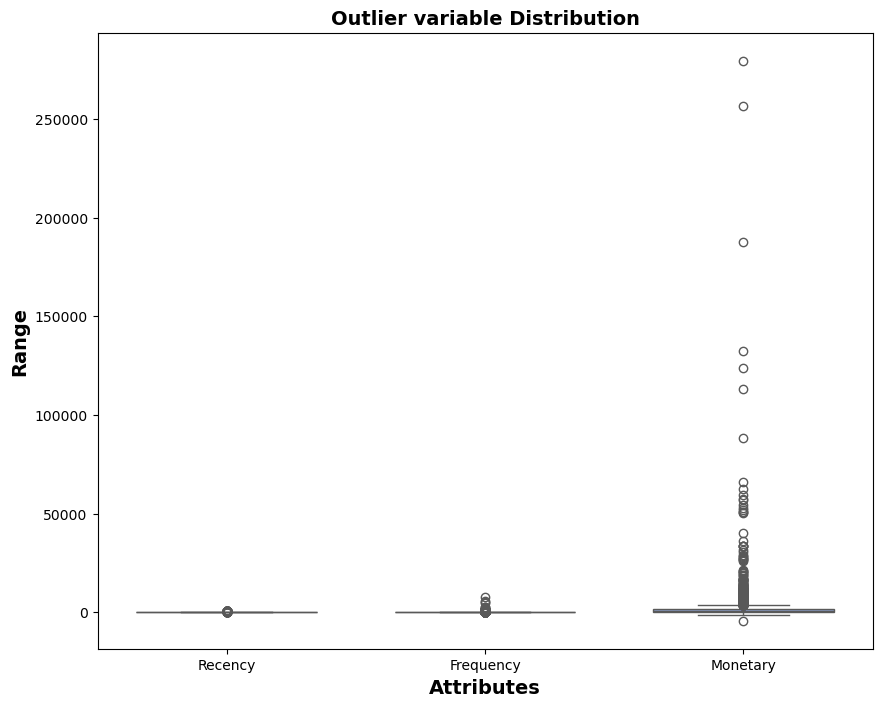

In [140]:
# outlier Analysis of Amount Frequency and Recency

attributes = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10 , 8 ]
sns.boxplot(data = rfm[attributes] , orient = 'v' , palette = 'Set2' , whis=1.5 , saturation = 1 , width = 0.7  )
plt.title('Outlier variable Distribution' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('Attributes' , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Range' , fontsize = 14 , fontweight = 'bold')
plt.show()

In [145]:
rfm.describe()

,Frequency,Monetary,Recency
count,4343.000000,4343.000000,4343.000000
mean,80.583928,1664.925223,101.578402
std,106.382306,6174.429707,114.072933
min,1.000000,-4287.630000,0.000000
25%,17.000000,291.710000,20.000000
50%,41.000000,642.770000,58.000000
75%,99.500000,1564.850000,153.000000
max,778.000000,256438.490000,697.000000


In [147]:
# Removing the (statistical)  outliers for amount
Q1 = rfm.Monetary.quantile(0.05)
Q3 =rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5 * IQR) & (rfm.Monetary <= Q3 + 1.5 * IQR)]


# Removing the (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 =rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5 * IQR) & (rfm.Recency <= Q3 + 1.5 * IQR)]

# Removing the (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 =rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5 * IQR) & (rfm.Frequency <= Q3 + 1.5 * IQR)]



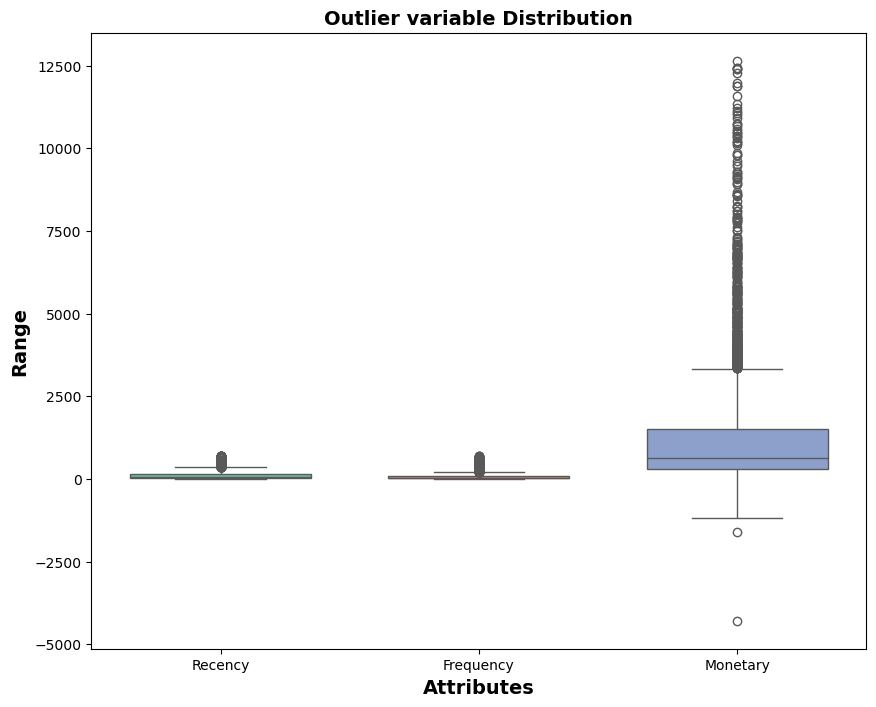

In [ ]:
# after removing the outliers

attributes = ['Recency', 'Frequency', 'Monetary']
plt.rcParams['figure.figsize'] = [10 , 8 ]
sns.boxplot(data = rfm[attributes] , orient = 'v' , palette = 'Set2' , whis=1.5 , saturation = 1 , width = 0.7  )
plt.title('Outlier variable Distribution' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('Attributes' , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Range' , fontsize = 14 , fontweight = 'bold')
plt.show()

In [152]:
# check for nulls
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Amount         0
Diff           0
dtype: int64

In [169]:
rfm.head()

,CustomerID,Frequency,Monetary,Recency
0,12346.0,2,0.00,326
1,12347.0,182,4310.00,40
2,12348.0,31,1797.24,76
3,12349.0,73,1757.55,19
4,12350.0,17,334.40,311


In [168]:
print(rfm.columns)
print(rfm.shape)

Index(['CustomerID', 'Frequency', 'Monetary', 'Recency'], dtype='object')
(4284, 4)


In [167]:
# Scaling the features 

rfm_df = rfm[['Frequency', 'Monetary', 'Recency']]
# instantiate the scaler
scaler = StandardScaler()

# fit_transform the data 
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4284, 3)

In [173]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Frequency', 'Amount', 'Recency']
rfm_df_scaled.head()

,Frequency,Amount,Recency
0,-0.763244,-0.737857,1.951863
1,1.082229,1.802214,-0.548364
2,-0.465918,0.321335,-0.233650
3,-0.035307,0.297944,-0.731947
4,-0.609455,-0.540780,1.820733


## Model Buliding 

In [174]:
## k_means with some arbitary 

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=4)

In [175]:
kmeans.labels_

array([2, 1, 0, ..., 0, 0, 0])

In [176]:
set(kmeans.labels_)

{0, 1, 2, 3}

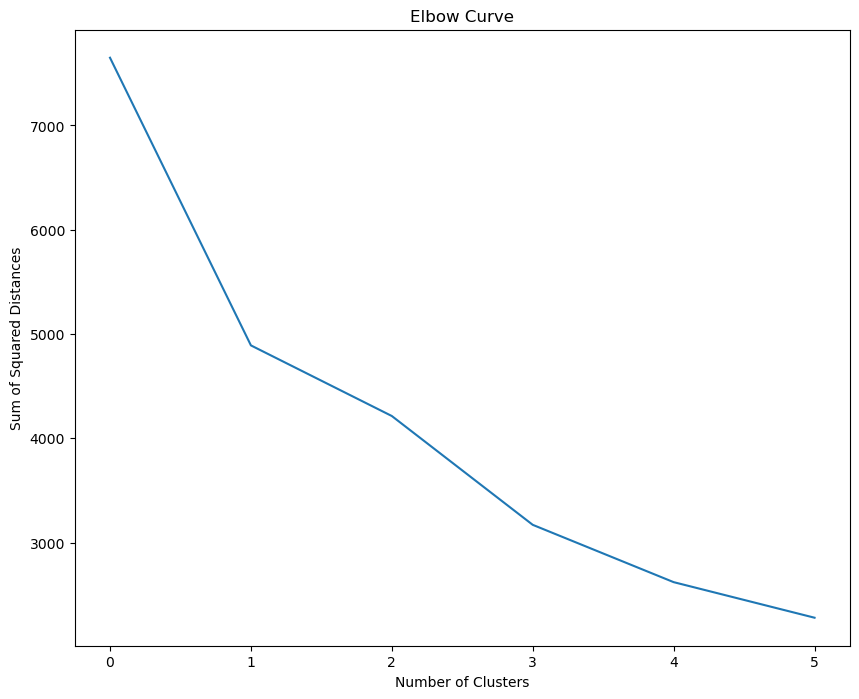

In [181]:
## Elbow Curve  to get the optimal number of clusters
ssd=[]
range_n_clusters = [i for i in range(2, 8)]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)

# plot the elbow curve 
plt.plot(ssd)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [182]:
# final model with k = 3 
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)


KMeans(max_iter=50, n_clusters=3)

In [183]:
import pickle
# Define the filename for pickle file 
filename = 'kmeans_model.pkl'

# open file in write mode
with open(filename , 'wb') as file:
    # dump the model to the file
    pickle.dump(kmeans, file)

# open file in read mode
with open(filename , 'rb') as file:
    # load the model from the file
    loaded_model = pickle.load(file)

# close the file 
file.close()

pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))
# load the model from the file


In [185]:
set(kmeans.labels_)

{0, 1, 2}

In [186]:
rfm['Cluster_Id'] = kmeans.predict(rfm_df_scaled)
rfm.head()

,CustomerID,Frequency,Monetary,Recency,Cluster_Id
0,12346.0,2,0.00,326,2
1,12347.0,182,4310.00,40,1
2,12348.0,31,1797.24,76,0
3,12349.0,73,1757.55,19,0
4,12350.0,17,334.40,311,2


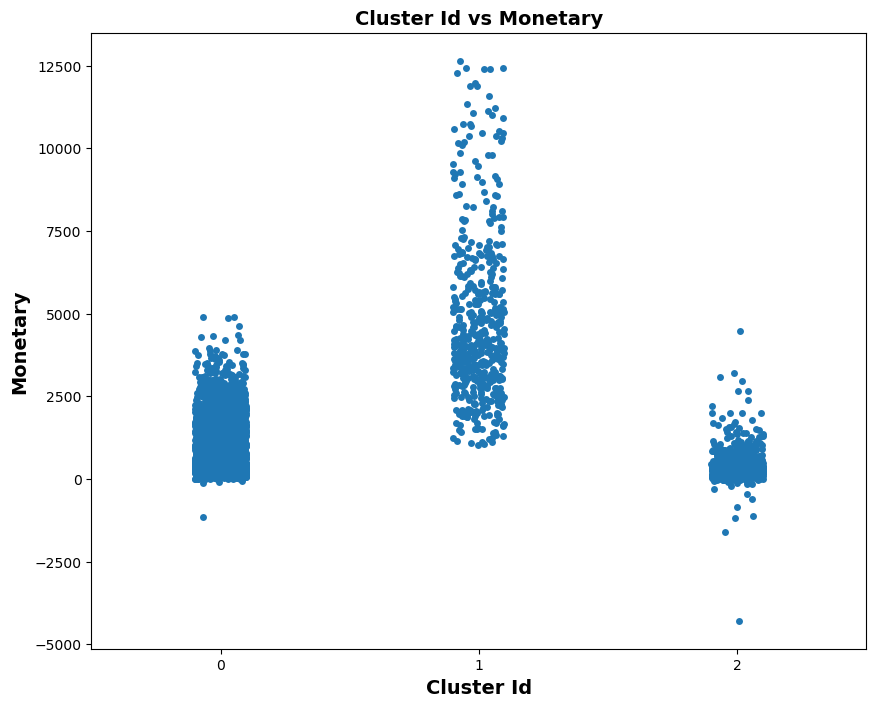

In [193]:
# Box plot to visualize Cluster ID vs Amount 

sns.stripplot(x = 'Cluster_Id' , y = 'Monetary' , data = rfm  )
plt.title('Cluster Id vs Monetary' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('Cluster Id' , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Monetary' , fontsize = 14 , fontweight = 'bold')
plt.show()
plt.savefig("Amountpplot.png")

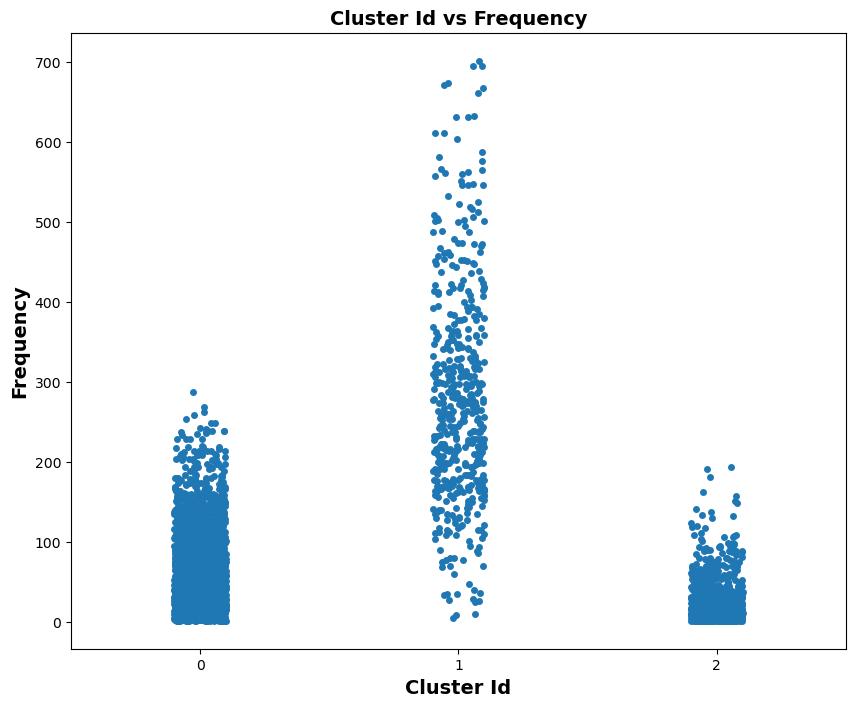

In [195]:
# Box plot to visualize Cluster ID vs Frequency 

sns.stripplot(x = 'Cluster_Id' , y = 'Frequency' , data = rfm  )
plt.title('Cluster Id vs Frequency' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('Cluster Id' , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Frequency' , fontsize = 14 , fontweight = 'bold')
plt.show()
plt.savefig("Cluster_Idfrequency.png")

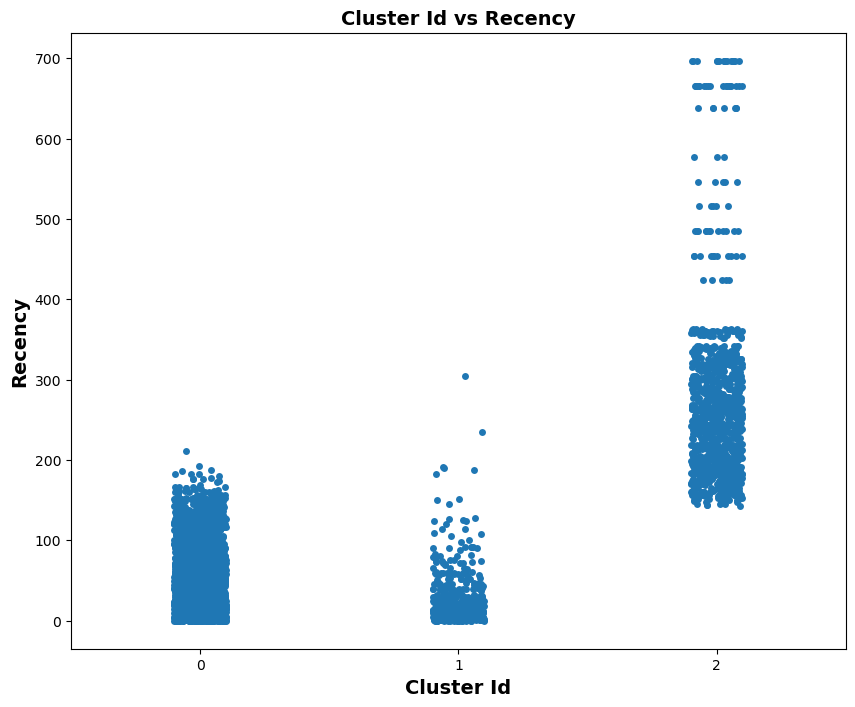

In [196]:
# Box plot to visualize Cluster ID vs Recency 

sns.stripplot(x = 'Cluster_Id' , y = 'Recency' , data = rfm  )
plt.title('Cluster Id vs Recency' , fontsize = 14 , fontweight = 'bold')
plt.xlabel('Cluster Id' , fontsize = 14 , fontweight = 'bold')
plt.ylabel('Recency' , fontsize = 14 , fontweight = 'bold')
plt.show()
plt.savefig("Cluster_IdRecency.png")